# Chapter 12 AP
### Math 313 
Jack Krebsbach


## 1. Question 10 

In [21]:
# Imports needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering

### Set the seed
To make sure that everything is reproducible lets set the seed.

In [68]:
np.random.seed(8765309)

In [23]:
# Generate synthetic data, to change the overlap change the shift
num_classes = 3
num_observations = 20
num_variables = 50

# Generate random data for each class
column_names = [f'var{i}' for i in range(1, num_variables + 1)] + ['target']
df = pd.DataFrame(columns= column_names)
for i in range(num_classes):
    shift = np.random.rand()*20
    for j in range(num_observations):
        row = np.sort(np.random.normal(loc = shift, size = num_variables ))
        row = np.append(row, i)
        df.loc[len(df)] = row
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var42,var43,var44,var45,var46,var47,var48,var49,var50,target
0,1.404953,1.883339,3.077459,3.212494,3.399321,3.465278,3.547957,3.582257,3.643144,3.698822,...,5.130939,5.224933,5.334653,5.389880,5.397144,5.422147,5.752373,5.977746,6.320522,0.0
1,2.297097,2.717924,2.751561,2.972657,2.990864,3.034356,3.105818,3.234045,3.262598,3.428162,...,5.483763,5.502126,5.623987,5.770294,5.805988,5.857118,6.585424,6.935412,7.028711,0.0
2,2.411158,2.641354,2.998206,3.165333,3.268160,3.275446,3.339763,3.355831,3.465392,3.470735,...,5.308407,5.354690,5.435263,5.580443,5.942052,6.098537,6.123935,6.303517,6.777785,0.0
3,2.294713,2.318332,2.701139,2.771979,2.936490,3.302196,3.548785,3.582400,3.606897,3.655398,...,5.210217,5.248374,5.258875,5.552222,5.890001,5.944293,6.002905,6.015678,6.023408,0.0
4,1.905595,2.094201,2.393453,2.644732,2.768487,2.969729,3.010258,3.058654,3.143534,3.198136,...,5.447281,5.818140,5.838818,6.089542,6.226379,6.467934,6.547042,6.719769,6.757416,0.0


In [24]:
# Create the PCA Analysis
pca_generated = PCA()
# Fit to the data
pca_generated.fit(df)
# Get the PCA scores
scores = pca_generated.transform(df)

Text(0.5, 1.0, 'Top Two Principal Components')

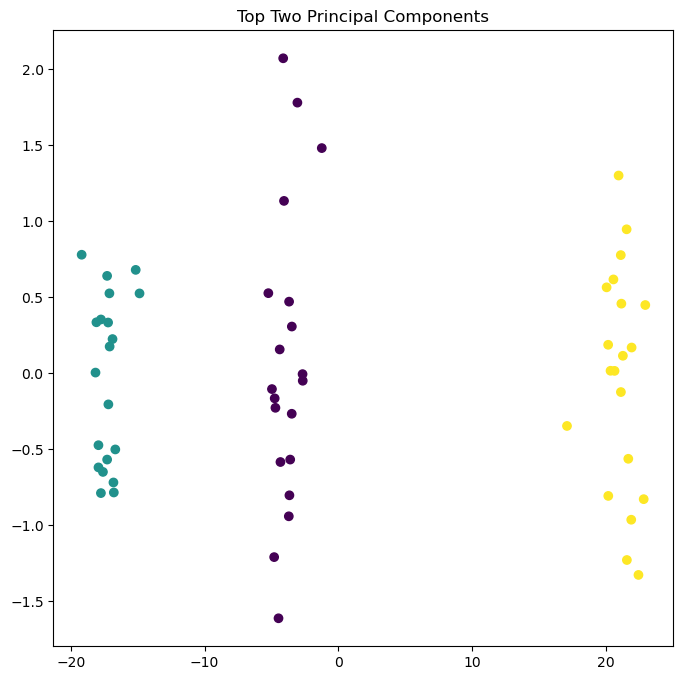

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1], c=df.target)
ax.set_title("Top Two Principal Components")

In [26]:
df_data = df.drop('target', axis=1)
df_target = df.target

#### Kmeans with 3 clusters
The kmeans classifier was able to perfectly classify the data, which makes sense as the first two PCA components showed a clear split between the three classes when plotted on the first two components.

col_0,0,1,2
target,,,
0.0,0,0,20
1.0,20,0,0
2.0,0,20,0


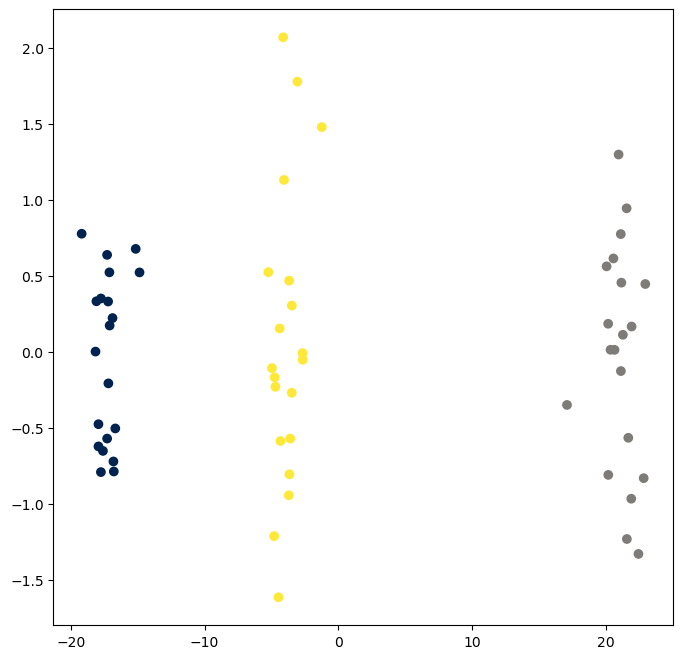

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
kmeans_3 = KMeans(n_clusters=3, random_state=3, n_init=20).fit(df_data)
ax.scatter(scores[:,0], scores[:,1], c=kmeans_3.labels_,cmap='cividis')
pd.crosstab(df_target, kmeans_3.labels_)

### Kmeans with 2 clusters

Clustering the data into 2 clusters shows the two classes that when plotted in the first two components of the PCA space are closer to each other on the left hand side of the graph were merged into one class.

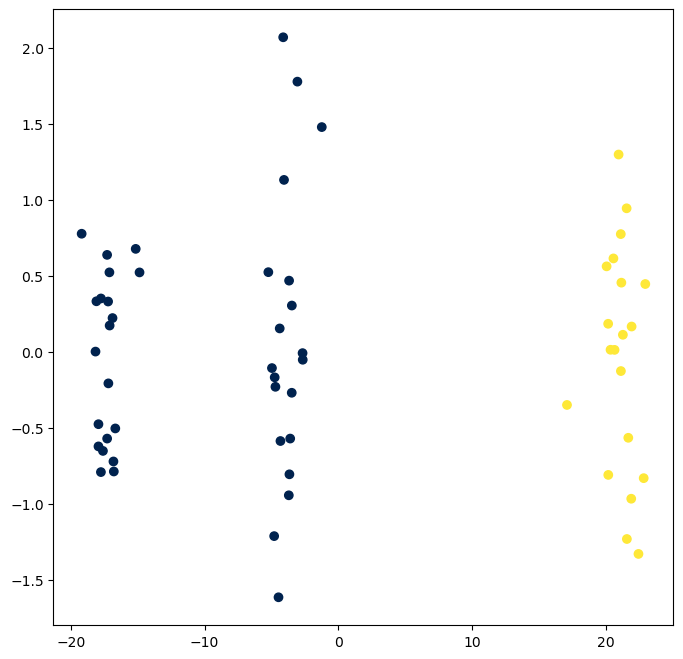

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
kmeans_2 = KMeans(n_clusters=2, random_state=3, n_init=20).fit(df_data)
ax.scatter(scores[:,0], scores[:,1], c=kmeans_2.labels_,cmap='cividis')

### Kmeans with 4 clusters

As the true data only have three classes the kmeans clustering was not able to form four distinct groups. However, the fourth group is just one data point, so in this iteration the clustering process produced classes close to the true labels.

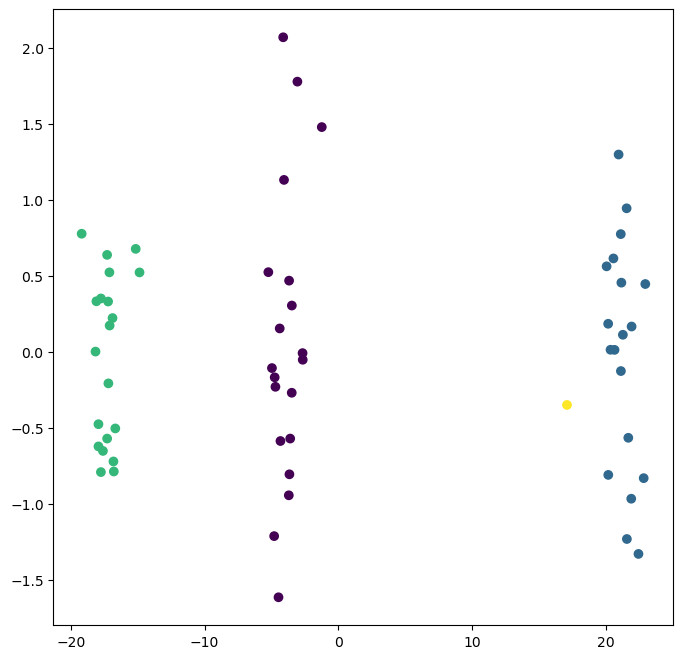

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
kmeans_4 = KMeans(n_clusters=4, random_state=3, n_init=20).fit(df_data)
ax.scatter(scores[:,0], scores[:,1], c=kmeans_4.labels_)

### Kmeans PCA
Using the first two principal components we are able to cluster the data perfectly into the three classes.

In [38]:
first_two_components = pd.DataFrame(scores[:,0:2])
kmeans_pca = KMeans(n_clusters=3, random_state=3, n_init=20).fit(first_two_components)
pd.crosstab(df_target, kmeans_pca.labels_)

col_0,0,1,2
target,,,
0.0,0,0,20
1.0,20,0,0
2.0,0,20,0


### Kmeans with scaled data
Again, the cluster was able to perfectly classify the data. The result is essentially equivalent to that of plotting the first two components of the PCA with the true classes in part (b).

In [47]:
scaler = StandardScaler(with_std=True, with_mean=False)
df_scaled = pd.DataFrame(scaler.fit_transform(df_data))
kmeans_3_scaled = KMeans(n_clusters=3, random_state=3, n_init=20).fit(df_scaled)
pd.crosstab(df_target, kmeans_3_scaled.labels_)

col_0,0,1,2
target,,,
0.0,0,0,20
1.0,20,0,0
2.0,0,20,0


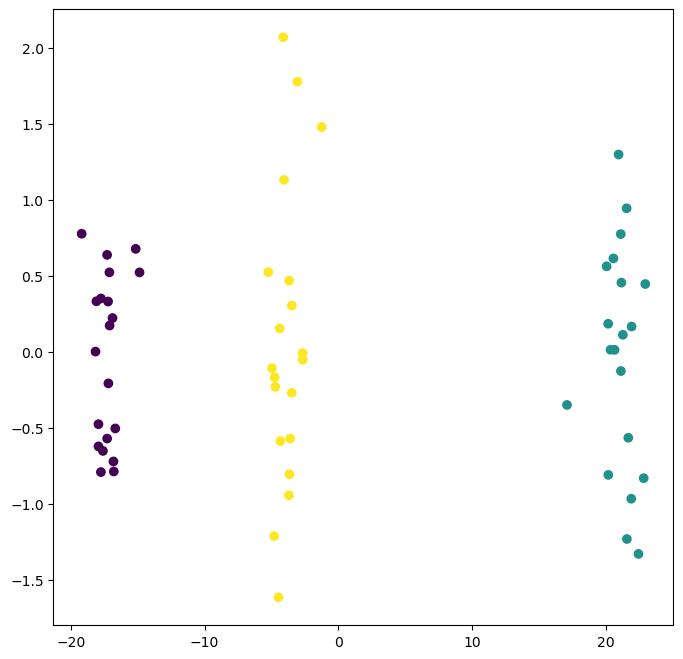

In [48]:
_, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1], c=kmeans_3_scaled.labels_)

## 2. Question written by the instructor 

In this assignment you are asked to perform kmeans and spectral clustering on the iris data set; for a detailed description, see https://archive.ics.uci.edu/dataset/53/iris.

### (1) First, load the data into Python using the following scripts.

In [57]:
iris = datasets.load_iris()

The features are stored in iris['data'] and the labels are in iris['target'].

How many instances are there?

And what are the feature and response names?

**Instances:** 150 observations or instances

**Features:** Four features: Sepal Length (cm), Sepal Width (cm), Petal length (cm), Petal Width (cm)

**Response Names:** Setosa, Versicolor, Virginica 

In [58]:
print('Iris data instances: {}'.format(iris.data.shape))
print('Iris target shape: {}'.format(iris.target.shape))
print('Iris target names: {}'.format(iris.target_names))
print(iris.keys())

Iris data instances: (150, 4)
Iris target shape: (150,)
Iris target names: ['setosa' 'versicolor' 'virginica']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


### (2) Standardize the features of the iris data set for all subsequent steps.

In [59]:
scaler = StandardScaler(with_std=True, with_mean=True) 
iris_scaled = scaler.fit_transform(iris.data)

### (3) Apply PCA to the data and plot their first two principal components, color coded by the true labels.

What percentage of the scatter of the data is explained by the top two principal components?

The top two principal components explains 95.8% of the scatter

Explained Variance by first two components: 0.9581320720000165


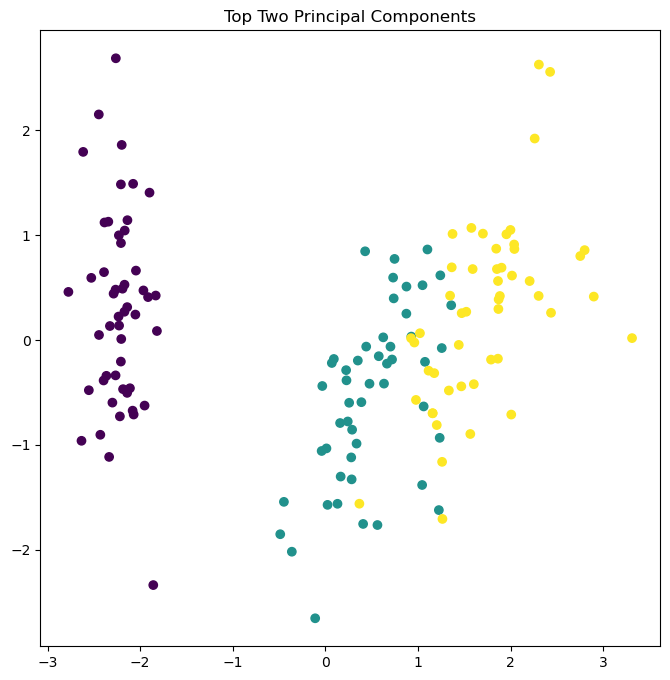

In [60]:
# Create the PCA Analysis
pca_iris = PCA()
# Fit to the data
pca_iris.fit(iris_scaled)
# Get the PCA scores
scores = pca_iris.transform(iris_scaled)
true_labels = iris.target


fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1], c=iris.target)
ax.set_title("Top Two Principal Components")

var_ratio = pca_iris.explained_variance_ratio_
print('Explained Variance by first two components: {}'.format(var_ratio[0]+ var_ratio[1]))

### (4)  Apply kmeans, with the true number of clusters, to the iris data (using all the features, not the 2D principal components).  

Using kmeans we were able to get a classification accuracy of around 83% percent. (See confusion matrix below)


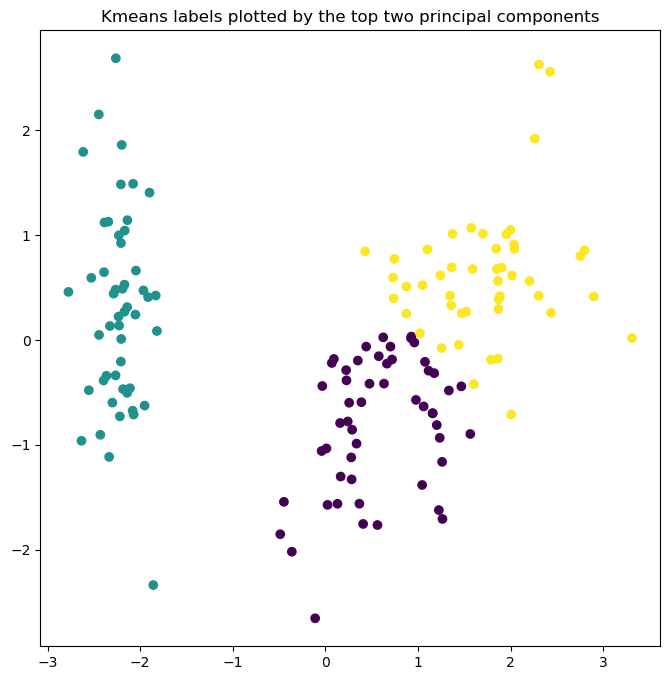

In [61]:
kmeans = KMeans(n_clusters=3, random_state=3, n_init=20).fit(iris_scaled)
cluster_labels = kmeans.labels_

_, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1], c=cluster_labels)
ax.set_title("Kmeans labels plotted by the top two principal components");

In [62]:
#Confusion matrix for kmeans
cm = confusion_matrix(iris.target,cluster_labels)

# Correct confusion matrix
cm_argmax = cm.argmax(axis=0)
y_pred = np.array([cm_argmax[i] for i in cluster_labels])

print('Accuracy {}'.format(accuracy_score(iris.target, y_pred)))
cm = confusion_matrix(iris.target, y_pred)
cm

Accuracy 0.8333333333333334


array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 14, 36]])

### (5) Try different numbers of clusters with kmeans, k=2, ..., 6, and plot the amounts of total scatter (against k) found by kmeans. 

No. The elbow method can not identify the number of clusters in this data set. There is not a clear point where the scatter stops decreasing drastically.


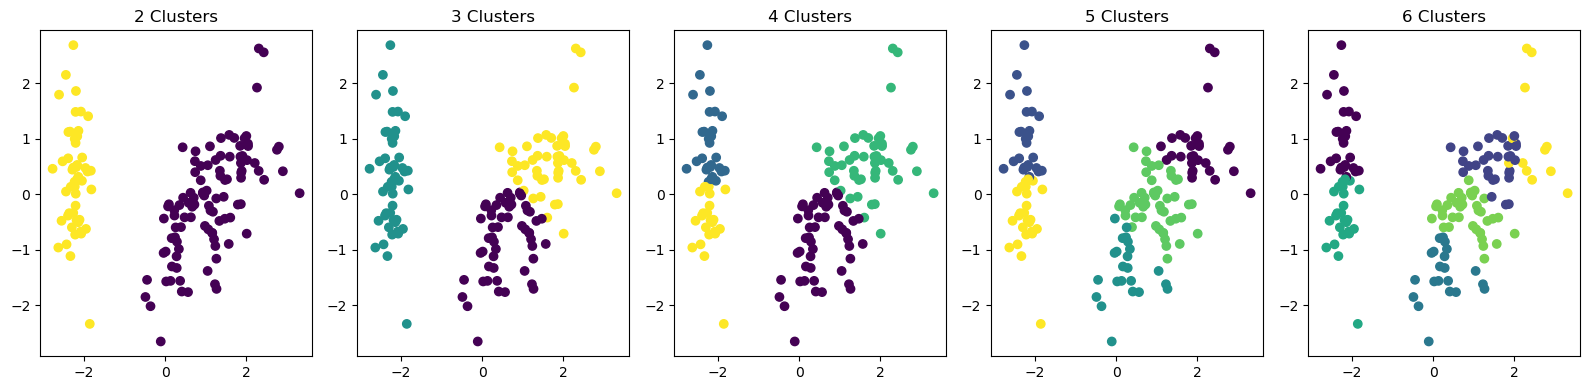

In [63]:
# First plot the different clusters
cluster_numbers = np.arange(2, 7)

_, axs = plt.subplots(1, len(cluster_numbers), figsize=(16, 4))

for i, num_clusters in enumerate(cluster_numbers):
    kmeans = KMeans(n_clusters=num_clusters, random_state=3, n_init=20).fit(iris_scaled)
    cluster_labels = kmeans.labels_
    axs[i].scatter(scores[:, 0], scores[:, 1], c=cluster_labels)
    axs[i].set_title("{} Clusters".format(num_clusters))

plt.tight_layout()
plt.show()

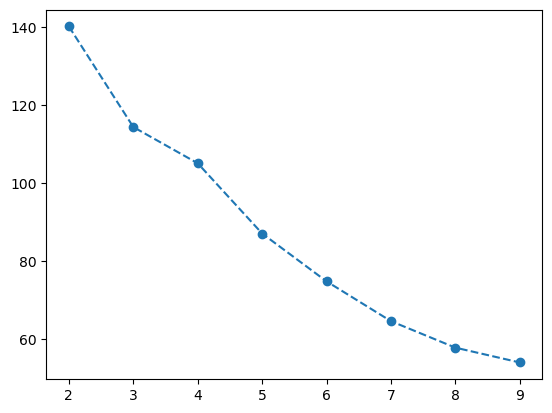

In [64]:
#Plot the total scatters to see if the elbow method works
scatter = []  
for i in np.arange(2,10):  # i is from 2 to 10
    kmeans = KMeans(n_clusters=i+1, n_init='auto').fit(iris_scaled)
    scatter.append(kmeans.inertia_)
    
plt.plot(np.arange(2,10), scatter, marker='o', linestyle="--")

### (6) Apply spectral clustering (with the true number of clusters) to the iris data that have been standardized. 


I used a sigma value of 0.71. I found it by using the best practice of finding the average distance from the *rth* nearest neighbor. Initially, it looked like using 7 for r did not work well as I was unable to get 3 classes, but increasing to the 10th nearest neighbor allowed me to get a split of 3 classes.

After tuning sigma spectral clustering produces a slightly higher accuracy than kmeans. Using 3 clusters in k-means clustering  an accuracy of ~83.3% was achieved and with spectral clustering an accuracy of ~84.6% was achieved.

In [65]:
r = 10
neighbors = NearestNeighbors(n_neighbors=r, algorithm='ball_tree').fit(iris_scaled)
distances, indices = neighbors.kneighbors(iris_scaled)

sigma = np.mean(distances[:,r-1])
sigma

0.7101252236363841

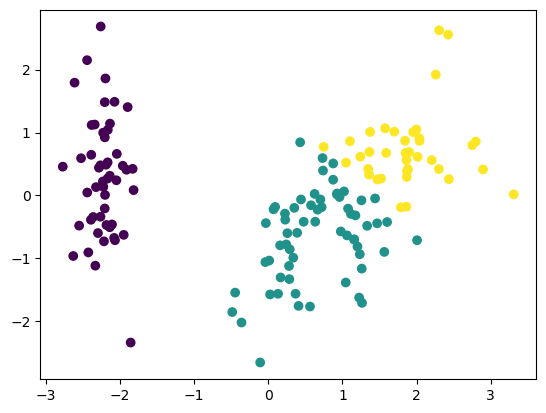

In [66]:
speclust = SpectralClustering(n_clusters=3, gamma = 1/(2*sigma**2)).fit(iris_scaled)
plt.scatter(x=scores[:,0], y=scores[:,1], c=speclust.labels_)

In [67]:
# Confusion matrix for spectral clustering
spec_labels = speclust.labels_

# Get confusion matrix
cm = confusion_matrix(iris.target,spec_labels)

# Correct confusion matrix
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in spec_labels])

print('Accuracy {}'.format(accuracy_score(iris.target, y_pred_)))
cm = confusion_matrix(iris.target, y_pred_)
cm

Accuracy 0.8466666666666667


array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0, 18, 32]])